# [A Fast Algorithm for Simulating the Chordal Schramm-Loewner Evolution](https://arxiv.org/pdf/math/0508002.pdf)

The Schramm-Loewner Evolution in the complex half-plane $\mathbb{H}$ is a family of random planar curves $\gamma_t$ described by the system:

* $f_0(z) = z$,
<br/>
* $\partial_t f_t(z) = f'_t(z) \frac{2}{\sqrt{\kappa} B_t - z}$,
<br/>
* $\gamma_t = f_t(\sqrt{\kappa} B_t)$.

Tom Kennedy proved in the attached paper that the SLE dynamic can be approximated by the repeated iterations of the following discretization scheme:

* $(\epsilon_k)$ i.i.d random variable equal to $\pm 1$ with probability $\frac{1}{2}$,
<br/>
* $(\Delta_k)$ is a sequence of discretization steps (e.g $\Delta_k = \frac{1}{n}$ to simulate $n$ points), 
<br/>
* $\alpha_k = \frac{1}{2} + \epsilon_k \frac{1}{2}\sqrt{\frac{\kappa}{16+\kappa}}$,
<br/>
* $h_k(z) = \bigg( z + 2 \sqrt{ \frac{\Delta_k (1-\alpha_k)}{\alpha_k} } \bigg)^{1-\alpha_k} \bigg( z - 2 \sqrt{ \frac{\Delta_k \alpha_k}{1-\alpha_k} } \bigg)^{\alpha_k}$,
<br/>
* $z_k = h_1 \circ \dots \circ h_k(0)$.


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sle import FastChordalSLEHalfPlane

### Utility to generate colorful plot

In [2]:
def plot_sle(x, y,  T, n, kappa):
    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    fig, ax = plt.subplots(figsize=(7, 7), nrows=1, ncols=1)

    # Create a continuous norm to map from data points to colors
    lc = LineCollection(segments, cmap='inferno')
    
    # Set the values used for colormapping
    lc.set_array(np.linspace(0, T, n+1))
    lc.set_linewidth(1)
    line = ax.add_collection(lc)
    fig.colorbar(line, ax=ax)
    ax.set_title('SLE({:.2f}), {} steps'.format(kappa, n))
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.axis('off')

    plt.tight_layout()
    plt.show()

### Initialize SLE

In [3]:
n = int(1e4)
T = 1.0
X = FastChordalSLEHalfPlane(n=n, T=T, x0=0.0j)

### $\kappa=0$ : slit along the imaginary axis

100%|██████████| 10000/10000 [00:02<00:00, 3340.37it/s]
/home/sauxpa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.


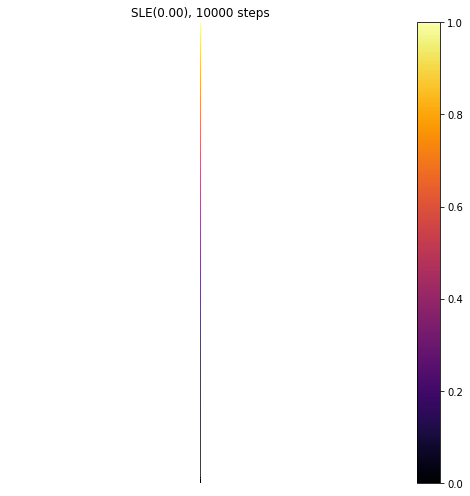

In [4]:
X.kappa = 0
x, y = X.simulate()
plot_sle(x, y,  X.T, X.n, X.kappa)

### $\kappa = 2$ : scaling limit of loop-erased random walks

100%|██████████| 10000/10000 [00:18<00:00, 555.54it/s]


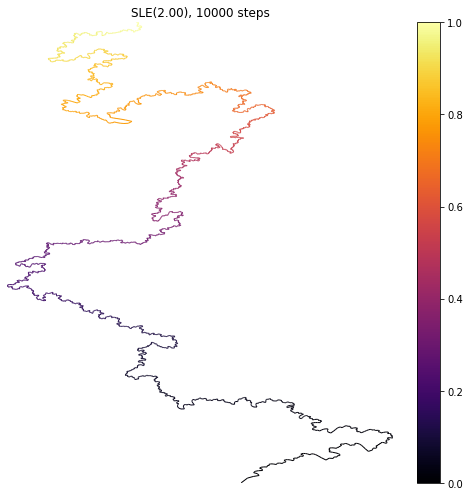

In [5]:
X.kappa = 2
x, y = X.simulate()
plot_sle(x, y,  X.T, X.n, X.kappa)

### $\kappa = \frac{8}{3}$ : (conjectured to be) scaling limit of self-avoiding random walks

100%|██████████| 10000/10000 [00:18<00:00, 542.89it/s]


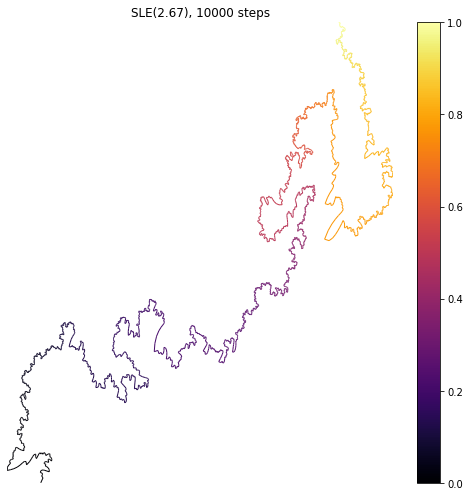

In [6]:
X.kappa = 8/3
x, y = X.simulate()
plot_sle(x, y,  X.T, X.n, X.kappa)

### $\kappa = 6$ : critical percolation

100%|██████████| 10000/10000 [00:16<00:00, 589.18it/s]


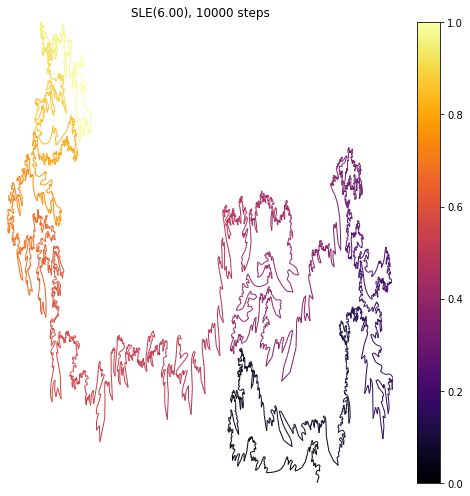

In [7]:
X.kappa = 6
x, y = X.simulate()
plot_sle(x, y,  X.T, X.n, X.kappa)

### $\kappa = 12$ : space-filling

100%|██████████| 10000/10000 [00:16<00:00, 598.78it/s]


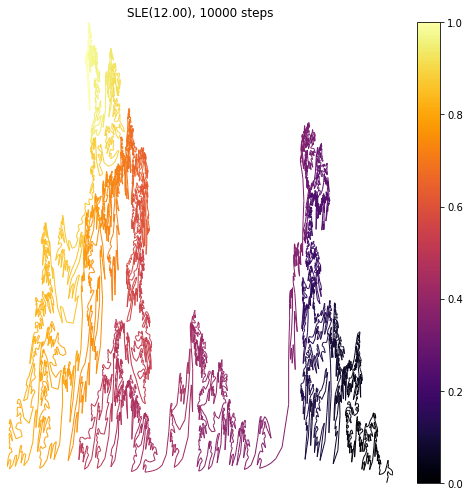

In [8]:
X.kappa = 12
x, y = X.simulate()
plot_sle(x, y,  X.T, X.n, X.kappa)